# **Isaias Chavarria Mora -> Proyecto 1**

# Ejercicio 1

Escribir un programa que pregunte al usuario o genere las ventas
de los últimos 5 días, y muestre por pantalla una serie (Dataframe)
con los datos de las ventas por producto (opcional): Nro de
unidades y precio unitario, indexada por los días, antes y después
de aplicarles un descuento del 5%.
(Diversas opciones de solución: libre)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
np.random.seed(123456789)

print("Ventas de los ultimos 5 días por producto")

'''
Se crea una estructura que almacena los datos que se van a mostrar en el data Frame
Se utilizan 4 productos básicos de un supermercado para el ejercicio y se asigna una venta
variable en la cantidad de productos vendidos que va entre 10 y 150 productos al azar
'''
sales_data = {
    'Product':["Juice", "Snacks", "Meats", "Beauty"],
    'Unit Price':[500,800,2200,9000],  # Los precios Unitarios se Fijan en un monto razonable en Colones de Costa Rica
    'day 1':np.random.randint(10, 151, 4),
    'day 2':np.random.randint(10, 151, 4),
    'day 3':np.random.randint(10, 151, 4),
    'day 4':np.random.randint(10, 151, 4),
    'day 5':np.random.randint(10, 151, 4)
     }

#Se crea el Data Frame y se utiliza el producto como Index, para poder colocar los datos de cada producto en horizontal
df_sales = pd.DataFrame(sales_data).set_index('Product')

# se define el monto de Ventas total
df_sales["Total Sales"] = (df_sales["day 1"] + df_sales["day 2"] + df_sales["day 3"]  + df_sales["day 4"]  + df_sales["day 5"]) * df_sales["Unit Price"]

print("Antes del Descuento")

df_sales


Ventas de los ultimos 5 días por producto
Antes del Descuento


,Unit Price,day 1,day 2,day 3,day 4,day 5,Total Sales
Product,,,,,,,
Juice,500,60,89,126,117,84,238000
Snacks,800,100,94,92,123,84,394400
Meats,2200,39,109,133,116,132,1163800
Beauty,9000,17,121,118,17,95,3312000


In [ ]:
print("Aplicando descuento del Descuento")

df_sales["Discount(5%)"] = df_sales["Total Sales"] * 5 /100

df_sales["Net Sales"] = df_sales["Total Sales"] - df_sales["Discount(5%)"]

# se aplica un formato a las columnas que contienen montos, para que muestre el separador de miles y dos decimales
df_sales.style.format({
    "Net Sales": "{0:,.2f}",
    "Total Sales": "{0:,.2f}",
    "Discount(5%)": "{0:,.2f}",
})


Aplicando descuento del Descuento


,Unit Price,day 1,day 2,day 3,day 4,day 5,Total Sales,Discount(5%),Net Sales
Product,,,,,,,,,
Juice,500,60,89,126,117,84,"238,000.00","11,900.00","226,100.00"
Snacks,800,100,94,92,123,84,"394,400.00","19,720.00","374,680.00"
Meats,2200,39,109,133,116,132,"1,163,800.00","58,190.00","1,105,610.00"
Beauty,9000,17,121,118,17,95,"3,312,000.00","165,600.00","3,146,400.00"


# Ejercicio 2

Escribir un programa que reciba un diccionario con los ingresos
mensuales de los clientes de una empresa, y devuelva una serie
con el ingreso mínimo, máximo y media.
El resultado final debe ser una serie con los estadísticos.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
def CalculateStats(monthly_incomes):
  '''
    Calcula las estadísticas de un conjunto de Datos
    de tipo Diccionario {"llave": valor} donde llave es de tipo
    string y valor de tipo numerico.
    Ejemplo: {"Pedro": 800000, "Pablo": 650000, "Juan": 1000000}
  '''
  income_array = np.array(list(monthly_incomes.values()))
  income_array

  stats = [np.max(income_array),
          np.min(income_array),
          np.mean(income_array)
          ]
  stats_serie = pd.Series(stats, ["Maximo","Mínimo","Media"])
  return stats_serie

In [ ]:
# Se definen los nombres y se asignan los montos adecuados.

monthly_incomes = {"Pedro": 800000, "Pablo": 650000, "Juan": 1000000, "Ana": 900000, "María": 725000}

results = CalculateStats(monthly_incomes)
results

Maximo    1000000.0
Mínimo     650000.0
Media      815000.0
dtype: float64

# Ejercicio 3

Escribir programa que genere y muestre por pantalla un DataFrame
con los datos de la siguiente tabla:

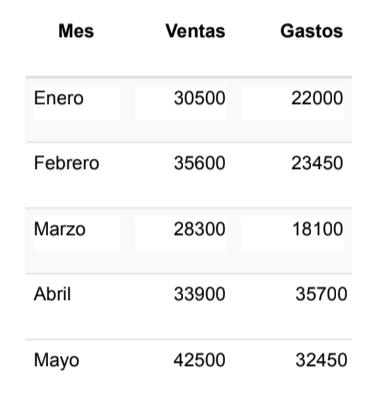


A continuación, generar nuevas columna:
1. Columna 1 = Gasto/Ventas*100.
2. Columna 2 = Si Ventas>= 30000, imprimir “Meta Superada”,
caso contrario imprimir “Meta no Superada”.
3. Columna 3 = Si Gasto>Ventas, calcular el sobre gasto.
4. Obtener el total de las ventas de los últimos 3 meses
5. Obtener el total de gastos de febrero a abril

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
monthly_sales = {
    'Mes':["Enero", "Febrero", "Marzo", "Abril", "Mayo"],
    'Ventas':[30500, 35600, 28300, 33900, 42500],
    'Gastos':[22000, 23450, 18100, 35700, 32450]
     }

df_monthly_sales = pd.DataFrame(monthly_sales);

##Calculos
df_monthly_sales["Columna 1"] = (df_monthly_sales["Gastos"]/df_monthly_sales["Ventas"]) * 100
df_monthly_sales["Columna 2"] = np.where(df_monthly_sales['Ventas'] >= 30000, 'Meta Superada', 'Meta No superada')
df_monthly_sales["Columna 3"] = np.where(df_monthly_sales['Gastos'] > df_monthly_sales['Ventas'], df_monthly_sales['Gastos'] - df_monthly_sales['Ventas'] , 0)

df_monthly_sales


,Mes,Ventas,Gastos,Columna 1,Columna 2,Columna 3
0,Enero,30500,22000,72.131148,Meta Superada,0
1,Febrero,35600,23450,65.870787,Meta Superada,0
2,Marzo,28300,18100,63.957597,Meta No superada,0
3,Abril,33900,35700,105.309735,Meta Superada,1800
4,Mayo,42500,32450,76.352941,Meta Superada,0


In [ ]:
print("Ventas de los Ultimos 3 Meses\n")

result = df_monthly_sales.iloc[2:5, 2].sum()
result


Ventas de los Ultimos 3 Meses



86250

In [ ]:
print("Gastos de Febrero a Abril \n")

result = df_monthly_sales.iloc[1:4, 3].sum()
result


Gastos de Febrero a Abril 



235.13811820327317

# Ejercicio 4

Con el siguiente fichero *datos_seguros.csv* contiene información
de riesgo de clientes de un banco. Escribir un programa con los
siguientes requisitos:
1. Generar un DataFrame con los datos del fichero.
2. Mostrar por pantalla las dimensiones del DataFrame, el
número de datos que contiene, los nombres de sus columnas
y filas, los tipos de datos de las columnas, mostrar las 10
primeras filas y las 10 últimas filas, verificar si tiene datos
perdidos/nulos.
3. Extraer las 1000 primeras filas y almacenarlas en un
contenedor.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:

# Se descomprime el archivo ZIP
!unzip datos_seguros.csv.zip

Archive:  datos_seguros.csv.zip
Created by ZIP Extractor v4.50 (https://zipextractor.app)
replace datos_seguros.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: datos_seguros.csv       


In [ ]:
df_datos_seguros = pd.read_csv('datos_seguros.csv', sep=';')

df_datos_seguros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45798 entries, 0 to 45797
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MES_T0                   45798 non-null  int64  
 1   VENTA_SEGURO             45798 non-null  int64  
 2   NUM_TC_TOTAL_T2          25397 non-null  float64
 3   SALDO_BCO_T2             25452 non-null  float64
 4   LINEA_BCO_T2             25452 non-null  float64
 5   USO_LINEA_BCO_T2         25452 non-null  float64
 6   Nro_CTa_Ahorro_Bco_T1    44405 non-null  float64
 7   Ahorro_Sldo_Bco_T1       44405 non-null  float64
 8   monto_ope_t2             32927 non-null  float64
 9   PROM_ANUAL_MTO_OPERA     32927 non-null  float64
 10  MAX_MTO_OPERA_Anual      32927 non-null  float64
 11  Ratio_HospvsMtoTotal_t2  29719 non-null  float64
 12  SEXO                     45798 non-null  object 
 13  ANTIGUEDAD_MES           45798 non-null  int64  
 14  DEPARTAMENTO          

In [ ]:
#Primeras 10 Filas

df_datos_seguros.head(10)

,MES_T0,VENTA_SEGURO,NUM_TC_TOTAL_T2,SALDO_BCO_T2,LINEA_BCO_T2,USO_LINEA_BCO_T2,Nro_CTa_Ahorro_Bco_T1,Ahorro_Sldo_Bco_T1,monto_ope_t2,PROM_ANUAL_MTO_OPERA,MAX_MTO_OPERA_Anual,Ratio_HospvsMtoTotal_t2,SEXO,ANTIGUEDAD_MES,DEPARTAMENTO,SOW_BCO_T2,SOW_BCO_SEMESTRAL
0,201506,0,3.0,0.0,2300.0,0.000000,0.0,0.0,15.00,18.644444,52.80,NaN,M,58,LIMA,0.000000,0.000000
1,201506,0,2.0,3215.0,3500.0,0.918571,0.0,0.0,548.98,2632.020000,5709.24,NaN,M,69,JUNIN,0.816134,0.930867
2,201506,0,1.0,3169.0,5000.0,0.633800,0.0,0.0,0.00,4999.000000,4999.00,0.0,M,16,CALLAO,1.000000,1.000000
3,201506,1,1.0,6495.0,8450.0,0.768639,2.0,505.0,2137.94,4900.191666,11206.80,NaN,F,62,LIMA,0.413831,0.505504
4,201506,0,NaN,NaN,NaN,NaN,0.0,0.0,12.37,12.370000,12.37,NaN,F,5,AREQUIPA,0.000000,0.000000
5,201506,0,3.0,2373.0,9373.0,0.253174,0.0,0.0,411.86,1410.662727,5055.62,NaN,M,44,CALLAO,0.181633,0.677393
6,201506,0,2.0,0.0,0.0,0.000000,1.0,2662.0,46.00,218.393333,390.90,NaN,M,4,LIMA,0.000000,0.000000
7,201506,0,1.0,3023.0,16720.0,0.180801,0.0,0.0,2982.90,1721.769166,3137.70,0.0,M,136,LIMA,1.000000,1.000000
8,201506,0,1.0,1931.0,12500.0,0.154480,0.0,0.0,412.00,986.337500,2119.00,NaN,M,292,LIMA,0.278603,0.541839
9,201506,0,NaN,NaN,NaN,NaN,2.0,40718.0,1644.30,1581.335000,3565.14,NaN,F,49,AREQUIPA,0.000000,0.000000


In [ ]:
# Ultimas 10 Filas
df_datos_seguros.tail(10)

,MES_T0,VENTA_SEGURO,NUM_TC_TOTAL_T2,SALDO_BCO_T2,LINEA_BCO_T2,USO_LINEA_BCO_T2,Nro_CTa_Ahorro_Bco_T1,Ahorro_Sldo_Bco_T1,monto_ope_t2,PROM_ANUAL_MTO_OPERA,MAX_MTO_OPERA_Anual,Ratio_HospvsMtoTotal_t2,SEXO,ANTIGUEDAD_MES,DEPARTAMENTO,SOW_BCO_T2,SOW_BCO_SEMESTRAL
45788,201505,0,4.0,0.0,0.0,0.0,0.0,0.0,1054.41,688.975000,1054.41,NaN,F,105,LIMA,0.0,0.0
45789,201505,0,1.0,0.0,0.0,0.0,2.0,8217.0,0.00,681.600000,1337.00,0.0,M,31,ANCASH,0.0,0.0
45790,201505,0,2.0,0.0,0.0,0.0,0.0,0.0,810.00,810.000000,810.00,NaN,M,226,LIMA,0.0,0.0
45791,201506,0,1.0,0.0,0.0,0.0,2.0,9261.0,4244.19,3466.162500,15419.30,0.0,F,204,UCAYALI,0.0,0.0
45792,201505,0,2.0,0.0,12000.0,0.0,2.0,804.0,277.20,237.600000,277.20,NaN,M,8,LA LIBERTAD,0.0,0.0
45793,201505,0,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,F,4,LIMA,0.0,0.0
45794,201505,0,NaN,NaN,NaN,NaN,2.0,6189.0,1314.10,1314.100000,1314.10,NaN,F,76,LA LIBERTAD,0.0,0.0
45795,201506,0,NaN,NaN,NaN,NaN,1.0,138.0,36.00,73.114285,220.00,NaN,F,20,LIMA,0.0,0.0
45796,201506,0,NaN,NaN,NaN,NaN,0.0,0.0,0.00,299.468750,830.00,0.0,M,23,PIURA,0.0,0.0
45797,201506,0,1.0,0.0,0.0,0.0,6.0,2762.0,0.00,780.000000,780.00,0.0,M,125,PASCO,0.0,0.0


In [ ]:
#Extraer las 1000 primeras filas y almacenarlas en un contenedor

first_1000_lines = df_datos_seguros.head(1000)

# se imprime el tamaño del contenedor
print("Tamanio del contenedor " + str(len(first_1000_lines)))

first_1000_lines.info()

Tamanio del contenedor 1000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MES_T0                   1000 non-null   int64  
 1   VENTA_SEGURO             1000 non-null   int64  
 2   NUM_TC_TOTAL_T2          621 non-null    float64
 3   SALDO_BCO_T2             622 non-null    float64
 4   LINEA_BCO_T2             622 non-null    float64
 5   USO_LINEA_BCO_T2         622 non-null    float64
 6   Nro_CTa_Ahorro_Bco_T1    995 non-null    float64
 7   Ahorro_Sldo_Bco_T1       995 non-null    float64
 8   monto_ope_t2             765 non-null    float64
 9   PROM_ANUAL_MTO_OPERA     765 non-null    float64
 10  MAX_MTO_OPERA_Anual      765 non-null    float64
 11  Ratio_HospvsMtoTotal_t2  613 non-null    float64
 12  SEXO                     1000 non-null   object 
 13  ANTIGUEDAD_MES           1000 non-null   int64  
 1

In [ ]:
df_not_null = df_datos_seguros.dropna()

df_not_null.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10260 entries, 2 to 45797
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MES_T0                   10260 non-null  int64  
 1   VENTA_SEGURO             10260 non-null  int64  
 2   NUM_TC_TOTAL_T2          10260 non-null  float64
 3   SALDO_BCO_T2             10260 non-null  float64
 4   LINEA_BCO_T2             10260 non-null  float64
 5   USO_LINEA_BCO_T2         10260 non-null  float64
 6   Nro_CTa_Ahorro_Bco_T1    10260 non-null  float64
 7   Ahorro_Sldo_Bco_T1       10260 non-null  float64
 8   monto_ope_t2             10260 non-null  float64
 9   PROM_ANUAL_MTO_OPERA     10260 non-null  float64
 10  MAX_MTO_OPERA_Anual      10260 non-null  float64
 11  Ratio_HospvsMtoTotal_t2  10260 non-null  float64
 12  SEXO                     10260 non-null  object 
 13  ANTIGUEDAD_MES           10260 non-null  int64  
 14  DEPARTAMENTO          